## Семинар 7 - Нейросети

In [ ]:
!pip install torch torchvision

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from tqdm import tqdm
import warnings
# warnings.simplefilter('ignore')
import torch
from torch.utils.data import DataLoader, Dataset, Subset
import torchvision
from torchvision import transforms
from matplotlib import pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
import torch
print(torch.__version__)

1.7.0+cu101


# 1. Вспомним PyTorch

Эта часть основана на материалах курса [dlschool](https://www.dlschool.org/)

Нахождение сложной производной

Найдите производную по x от функции 
$$\sin\left(\tan(x)\frac{x^2}{y} + \ln(e^{-x^2 + 3}+x^3y)\right)\tan(x^2e^{x^9})$$

При этом надо пользоваться встроенным в PyTorch autograd. Численное вычисление производной может не дать нужный результат.

In [ ]:
def find_x_derivative(x, y):
    # Ваш код здесь
    
    return 

In [ ]:
find_x_derivative(1,21)

tensor([-9.0207], dtype=torch.float64)

Нахождение косинусной близости

Вам даны две матрицы A и B. Необходимо посчитать косинусную близость между строчками матрицы A и столбцами матрицы B. Ответ - матрица чисел, где номер строки - номер строки из матрицы А, а номер столбца - номер столбца из В, от которых бралась косинусная близость.

Напомним, что косинусная близость двух векторов - косинус угла между ними. В n-мерном пространстве косинус угла между веткорами удобнее всего через скалярное произведение:
$$\cos(angle(x, y)) = \frac{x \cdot y}{\left\|x\right\| \left\|y\right\|}$$


In [ ]:
def get_cos_sim(A, B):
    """
        A, B - torch float tensors
    """
    # Ваш код здесь
   

    res = 
    
    return res

In [ ]:
A = [[1, -47, 25, -3], [10, 17, -15, 22], [-3, -7, 26, 36], [12, -27, -42, 0]]
B = [[-50, -13, 1, 10, 1242], [21, 48, -13, -14, -20], [20, 15, 11, 43, 11], [11, 103, 147, 27, -8]]

In [ ]:
torch.mean(get_cos_sim(A, B))

tensor(0.1498)

# Практика: Погружение в глубокое обучение
В семинаре, будем использовать набор данных `fashion_mnist`, загрузим их

In [ ]:
from torchvision import datasets,transforms

In [ ]:
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', train = True, download=True)

Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/train-images-idx3-ubyte.gz to /root/.pytorch/F_MNIST_data/FashionMNIST/raw


Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to /root/.pytorch/F_MNIST_data/FashionMNIST/raw


Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to /root/.pytorch/F_MNIST_data/FashionMNIST/raw




Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to /root/.pytorch/F_MNIST_data/FashionMNIST/raw
Processing...
Done!


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:480: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [ ]:
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', train = False, download = True)

In [ ]:
num_classes = len(trainset.classes)

In [ ]:
trainset.classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
x_train = trainset.train_data
y_train = trainset.train_labels

x_test = testset.train_data
y_test = testset.train_labels

/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:58: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:48: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


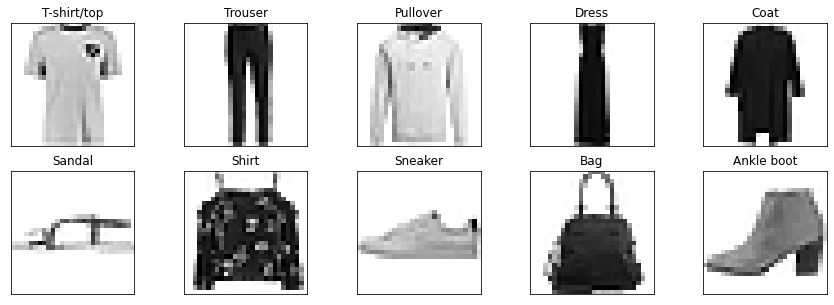

In [ ]:
fig = plt.figure(figsize=(15,5))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(y_train[:]==i)[0]
    features_idx = x_train[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(trainset.classes[i])
    plt.imshow(im, cmap='gray_r')
plt.show()

### Проведем небольшие предобработки

In [ ]:
x_train_flat = x_train.flatten(start_dim=1).float()
x_test_flat = x_test.flatten(start_dim=1).float()
print(f'Была размерность: {x_train.shape}, стала: {x_train_flat.shape}')
print(f'Была размерность: {x_test.shape}, стала: {x_test_flat.shape}')

Была размерность: torch.Size([60000, 28, 28]), стала: torch.Size([60000, 784])
Была размерность: torch.Size([10000, 28, 28]), стала: torch.Size([10000, 784])


In [ ]:
D_out =  # Ваш код здесь
D_in = 

In [ ]:
model = torch.nn.Sequential(
    torch.nn.Linear(D_in, 128),
    torch.nn.Sigmoid(),
    torch.nn.Linear(128, 10),
    torch.nn.Sigmoid(),
    torch.nn.Linear(10, D_out),
    torch.nn.Softmax(dim=1)
)

In [ ]:
# import torch.nn.functional as F

# class Model(torch.nn.Module):
#     def __init__(self):
#         super(Model, self).__init__()
#         self.fc1 = torch.nn.Linear(D_in, 128)
#         self.act1 = torch.nn.Sigmoid()
#         self.fc2 = torch.nn.Linear(128, 10)
#         self.act2 = torch.nn.Sigmoid()
#         self.fc3 = torch.nn.Linear(10, D_out)
#         self.act3 = torch.nn.Softmax(dim=1)

#     def forward(self, x):
#         x = self.fc1(x)
#         x = self.act1(x)
#         x = self.fc2(x)
#         x = self.act2(x)
#         x = self.fc3(x)
#         x = self.act3(x)
#         return x

# model = Model()

In [ ]:
model

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): Sigmoid()
  (2): Linear(in_features=128, out_features=10, bias=True)
  (3): Sigmoid()
  (4): Linear(in_features=10, out_features=10, bias=True)
  (5): Softmax(dim=1)
)

In [ ]:
# Forward pass: compute predicted y by passing x to the model. Module objects
# override the __call__ operator so you can call them like functions. When
# doing so you pass a Tensor of input data to the Module and it produces
# a Tensor of output data.
y_pred = model(x_train_flat)

In [ ]:
y_pred.shape

torch.Size([60000, 10])

In [ ]:
loss_fn = torch.nn.CrossEntropyLoss()

In [ ]:
# Compute and print loss. We pass Tensors containing the predicted and true
# values of y, and the loss function returns a Tensor containing the
# loss.
loss_old = loss_fn(y_pred, y_train)

In [ ]:
acc_old = accuracy_score(y_train.numpy(), y_pred.argmax(dim=1).numpy())

In [ ]:
# Zero the gradients before running the backward pass.
model.zero_grad()

In [ ]:
# Backward pass: compute gradient of the loss with respect to all the learnable
# parameters of the model. Internally, the parameters of each Module are stored
# in Tensors with requires_grad=True, so this call will compute gradients for
# all learnable parameters in the model.
loss_old.backward()

In [ ]:
learning_rate = 1e-2

In [ ]:
# Update the weights using gradient descent. Each parameter is a Tensor, so
# we can access its gradients like we did before.
with torch.no_grad():
  # Ваш код здесь

In [ ]:
y_pred = model(x_train_flat.float())
loss_new = loss_fn(y_pred, y_train)
step = loss_new.item()-loss_old.item()

acc_new = accuracy_score(y_train.numpy(), y_pred.argmax(dim=1).numpy())



print(f'Лосс: {loss_old.item()} -> {loss_new.item()}. Step {step} ')
print(f'Accuracy: {acc_old} -> {acc_new}')

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1639: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Лосс: 2.3027663230895996 -> 2.302748680114746. Step -1.7642974853515625e-05 
Accuracy: 0.10001666666666667 -> 0.10001666666666667


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  del sys.path[0]


In [ ]:
def batch_train(model, loss_fn, learning_rate, x, y):
  # Ваш код здесь
    
    return(loss.item())

In [ ]:
def train(model, n_epochs, batch_size, learning_rate,  X, y, X_test, y_test):
    acc_train_all = []
    loss_train_all = []
    acc_test_all = []
    loss_test_all = []

    for epoch in range(n_epochs):

        permutation = torch.randperm(X.size()[0])

        for i in tqdm(range(0,X.float().size()[0], batch_size)):
            indices = permutation[i:i+batch_size]
            batch_x, batch_y = X[indices], y[indices]
            batch_train(model, loss_fn, learning_rate, batch_x, batch_y)

        y_test_pred = model(X_test)
        y_train_pred = model(X)


        acc_train = accuracy_score(y.numpy(), y_train_pred.argmax(dim=1).numpy())
        loss_train = loss_fn(y_train_pred, y).detach().numpy() 
        acc_test = accuracy_score(y_test.numpy(), y_test_pred.argmax(dim=1).numpy())
        loss_test = loss_fn(y_test_pred, y_test).detach().numpy()

        acc_train_all = np.append(acc_train_all, acc_train)
        loss_train_all = np.append(loss_train_all, loss_train)
        acc_test_all = np.append(acc_test_all, acc_test)
        loss_test_all = np.append(loss_test_all, loss_test)


        print(f'Epoch {epoch}: \n Accuracy - train: {acc_train} | test: {acc_test} \n Loss - train: {loss_train} | test: {loss_test}')
        
    return(acc_train_all, loss_train_all, acc_test_all, loss_test_all)

In [ ]:
n_epochs = 10
batch_size = 1000 
learning_rate = 1e-1

acc_train_all, loss_train_all, acc_test_all, loss_test_all = \
          train(model, n_epochs, batch_size, learning_rate, x_train_flat, y_train, x_test_flat, y_test)


100%|██████████| 60/60 [00:02<00:00, 28.36it/s]


KeyboardInterrupt: ignored

In [ ]:
def vis_history(acc_train_all, loss_train_all, acc_test_all, loss_test_all):
    fig = plt.figure(figsize=(16, 4))

    plt.subplot(1, 2, 1)

    plt.plot(loss_train_all, label='loss')
    plt.plot(loss_test_all, label='val_loss')

    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(acc_train_all, label='acc')
    plt.plot(acc_test_all, label='val_acc')

    plt.legend()
    plt.show()

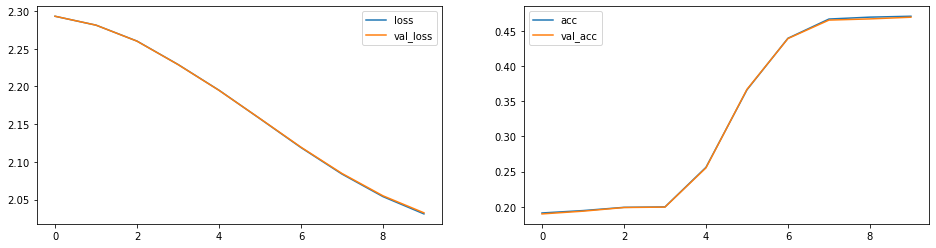

In [ ]:
vis_history(acc_train_all, loss_train_all, acc_test_all, loss_test_all)

## Что мы можем улучшить? 
- Отнормировать признаки
- Заменить сигмоиды на ReLu
- Задать правила инициации весов

### Нормировка
![picture](https://drive.google.com/uc?export=view&id=1cZ12oLwDToKVev2bdTvzzNoFVOU_jKYn)

In [ ]:
# Ваш код здесь


x_train_norm = 
x_test_norm = 

In [ ]:
x_train_norm.max(), x_train_norm.min()

(tensor(2.0224), tensor(-0.8103))

In [ ]:
n_epochs = 10
batch_size = 2028 
learning_rate = 1e-2

acc_train_all, loss_train_all, acc_test_all, loss_test_all = train(model, n_epochs, batch_size, learning_rate,
                                                                   x_train_norm, y_train, x_test_norm, y_test)


In [ ]:
vis_history(acc_train_all, loss_train_all, acc_test_all, loss_test_all)

### Инициациия весов
__Случайно__  
$ w = a * random$, но тогда если $a \gg 1$, то на выходе $b\gg1$ и если $a \ll 1 $, то $b \approx 0 $  

__Xavier__  
$a = \frac{1}{\sqrt{n}}$, где $n$ - кол-во нейронов на входе

__He__  
$a = \frac{1}{\sqrt{\frac{n}{2}}}$, где $n$ - кол-во нейронов на входе

In [ ]:
def init_weights(m):
    if type(m) == torch.nn.Linear:
        torch.nn.init.xavier_uniform(m.weight)
        m.bias.data.fill_(0.01)

Примените к модели  функцию инициации весов с помощью метода .apply()

In [ ]:
model_2 =  # Ваш Код здесь

In [ ]:
n_epochs = 10
batch_size = 2028 
learning_rate = 1e-2

acc_train_all, loss_train_all, acc_test_all, loss_test_all = train(model_2, n_epochs, batch_size, learning_rate,
                                                                   x_train_norm, y_train, x_test_norm, y_test)


In [ ]:
vis_history(acc_train_all, loss_train_all, acc_test_all, loss_test_all)

### Функции активации
![picture](https://drive.google.com/uc?export=view&id=1E-p46g_GUEV4Z87-Ys9pwIn8_ZvyZW0s)

In [ ]:
model_2 =  # Ваш Код здесь

In [ ]:
n_epochs = 100
batch_size = 2028 
learning_rate = 1e-2

acc_train_all, loss_train_all, acc_test_all, loss_test_all = train(model_2, n_epochs, batch_size, learning_rate,
                                                                   x_train_norm, y_train, x_test_norm, y_test)


In [ ]:
vis_history(acc_train_all, loss_train_all, acc_test_all, loss_test_all)

## Влияние скорости обучения
Посмотрим, как влияет параметр `learning_rate` на качество нашей модели на обучающей выборке

In [ ]:
learning_rates = [1e+1, 1e-2, 1e-3, 1e-5, 1e-10] 

In [ ]:
voc_loss_train = {}
batch_size = 5000

for i in learning_rates:
    model_2.apply(init_weights)
    acc_train_all, loss_train_all, acc_test_all, loss_test_all = train(model_2, 25, batch_size, i,
                                                                       x_train_flat, y_train, x_test_flat, y_test)
    voc_loss_train[i] = loss_train_all

In [ ]:
fig = plt.figure(figsize=(16, 4))

for i in voc_loss_train.keys():
    plt.plot(voc_loss_train[i], label=f'{i}')


plt.legend()
plt.show()

## Влияние метода оптимизации градиентного спуска

![picture](https://drive.google.com/uc?export=view&id=1wYGptX72S3sB4K21ktZzbqojHjssZ0xP)

#### Momentum
Вместо того, чтобы использовать только градиент текущего шага, мы будем накапливать импульс градиента прошлых шагов для определения направления движения. 
В связи со стохастической природой, обновления градиента происходят "зигзагообразно", с помощью момента мы усиливаем движение вдоль основного направления. На практике коэффициент у момента инициализируется на уровне 0,5 и постепенно увеличивается до 0,9 в течение нескольких эпох. 
  
#### RMSProp (Root Mean Square Propogation)   
Мы обновляяем меньше веса, которые слишком часто обновляются, и будем использовать усреднённый по истории квадрат градиента.

#### Adam (Adaptive moment estimation)
Cочетает в себе и идею накопления движения и идею более слабого обновления весов для типичных признаков

In [ ]:
optimizer = torch.optim.SGD(model_2.parameters(), lr=0.001, momentum=0.0)

In [ ]:
def batch_train(model, x, y):
    y_pred = model(x)
    loss = loss_fn(y_pred, y)
    model.zero_grad()
    loss.backward()
    #    with torch.no_grad():
    #    for param in model.parameters():
    #        param -= learning_rate * param.grad
    optimizer.step()
    return(loss.item())

In [ ]:
n_epochs = 100
batch_size = 1000


model_2.apply(init_weights)
loss_train_sgd = []

optimizer = torch.optim.SGD(model_2.parameters(), lr=0.001, momentum=0.0)

for epoch in range(n_epochs):

    permutation = torch.randperm(x_train_norm.size()[0])

    for i in tqdm(range(0,x_train_norm.float().size()[0], batch_size)):
        indices = permutation[i:i+batch_size]
        batch_x, batch_y = x_train_norm[indices], y_train[indices]
        batch_train(model_2, batch_x, batch_y)

    y_test_pred = model_2(x_test_norm)
    loss_train = loss_fn(y_test_pred, y_test).detach().numpy()
    print(f'Epoch: {epoch} loss {loss_train}')
    loss_train_sgd = np.append(loss_train_sgd, loss_train)

    
model_2.apply(init_weights)
loss_train_sgd_moment = []

optimizer = torch.optim.SGD(model_2.parameters(), lr=0.001, momentum=0.9)

for epoch in range(n_epochs):

    permutation = torch.randperm(x_train_norm.size()[0])

    for i in tqdm(range(0,x_train_norm.float().size()[0], batch_size)):
        indices = permutation[i:i+batch_size]
        batch_x, batch_y = x_train_norm[indices], y_train[indices]
        batch_train(model_2, batch_x, batch_y)

    y_test_pred = model_2(x_test_norm)
    loss_train = loss_fn(y_test_pred, y_test).detach().numpy()
    print(f'Epoch: {epoch} loss {loss_train}')
    loss_train_sgd_moment = np.append(loss_train_sgd_moment, loss_train)
    
    

model_2.apply(init_weights)
optimizer = torch.optim.Adam(model_2.parameters(), lr=0.001)
loss_train_adam = []


for epoch in range(n_epochs):

    permutation = torch.randperm(x_train_norm.size()[0])

    for i in tqdm(range(0,x_train_norm.float().size()[0], batch_size)):
        indices = permutation[i:i+batch_size]
        batch_x, batch_y = x_train_norm[indices], y_train[indices]
        batch_train(model_2, batch_x, batch_y)

    y_test_pred = model_2(x_test_norm)
    loss_train = loss_fn(y_test_pred, y_test).detach().numpy()
    print(f'Epoch: {epoch} loss {loss_train}')
    loss_train_adam = np.append(loss_train_all, loss_train)

In [ ]:
fig = plt.figure(figsize=(16, 4))

plt.plot(loss_train_sgd, label='SGD')
plt.plot(loss_train_sgd_moment, label='SGD with momentum')
plt.plot(loss_train_adam, label='Adam')

plt.legend()
plt.show()

# Ссылки
- [Курс "Deep learning на пальцах", лекция 4](https://youtu.be/tnrbx7V9RbA)
- [Статья: Оптимизация градиентного спуска](http://ruder.io/optimizing-gradient-descent/)
- [Статья: Методы оптимизации нейронных сетей](https://habr.com/ru/post/318970/)